# Data Cleaning in Pandas
Prepared by:
Nyalleng Moorosi - April 10th 2018

 In this practical we will learn how to do exploratory data analysis using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline  

** Read in the CSV file **

In [84]:
listings = pd.read_csv('listings2.csv')

**Have a look at the data**

In [85]:
listings[:3]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
0,0,2,3,This is a corner unit with a bigger garden tha...,1,559-wipstert-street,"[1, Pets, Alarm, Access Gate, Elec. Fencing, 4...",R 1 390 000,Duplex in Monument Park
1,1,3,4,The Main dwelling is accessed by means of a pe...,2,257-muckleneuk-street,"[2, Alarm, Access Gate, BIC, 257 Muckleneuk St...",R 3 000 000,House in New Muckleneuk
2,2,3,4,EXCLUSIVE MANDATEThis dreamy single storey hom...,2,262-indus,"[2, Pool, Elec. Fencing, Garden Cott., Patio, ...",R 3 450 000,House in Waterkloof Ridge


** Have a look at the datatypes in the the data frame **

In [90]:
listings.dtypes

Unnamed: 0       int64
bathrooms       object
bedrooms       float32
description     object
garage          object
location        object
other           object
price           object
title           object
dtype: object

** Transform your data

In [93]:
listings['bedrooms'] = pd.to_numeric(listings.bedrooms, downcast='float', errors='coerce')

In [94]:
listings[:3]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
0,0,2,3.0,This is a corner unit with a bigger garden tha...,1,559-wipstert-street,"[1, Pets, Alarm, Access Gate, Elec. Fencing, 4...",R 1 390 000,Duplex in Monument Park
1,1,3,4.0,The Main dwelling is accessed by means of a pe...,2,257-muckleneuk-street,"[2, Alarm, Access Gate, BIC, 257 Muckleneuk St...",R 3 000 000,House in New Muckleneuk
2,2,3,4.0,EXCLUSIVE MANDATEThis dreamy single storey hom...,2,262-indus,"[2, Pool, Elec. Fencing, Garden Cott., Patio, ...",R 3 450 000,House in Waterkloof Ridge


** Problem 1 ** : Write a lambda function that appends on to the dataframe a new column that contains the size of the description for each listing
--To set a new column do ** listings['desc_len']  = ..**

**Problem 2 ** Modify all other coloums that should be numeric

### Do some summary statistics
    -- extend to mean and average

In [89]:
listings['bedrooms'].mean()

2.921713352203369

### Grouping and further counting

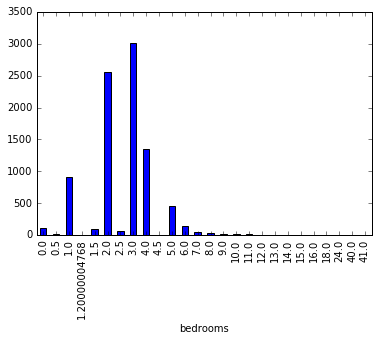

In [41]:
listings.groupby('bedrooms').agg('count')['price'].plot(kind = 'bar')

** Problem 3: ** Find the location with the most expensive housing 

** Select certain features of interest **

In [96]:
large_houses = listings[listings['bedrooms'] > 10]

In [97]:
large_houses[:3]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
203,203,6,11.0,An eleven bedroom house in a well situated lo...,Hayford Obeng,hatfield,[Hayford Obeng],R 4 500 000,House in Hatfield
227,227,6,11.0,An eleven bedroom house in a well situated lo...,Hayford Obeng,hatfield,[Hayford Obeng],R 4 500 000,House in Hatfield
244,244,9,11.0,Family home / Guesthouse or Excellent Investme...,2,eastwood,"[2, Pets, Alarm, Access Gate, Staff Quarters, ...",R 5 475 000,House in Eastwood


** Problem 4: ** Find Houses that have the same number of bedrooms as bathrooms

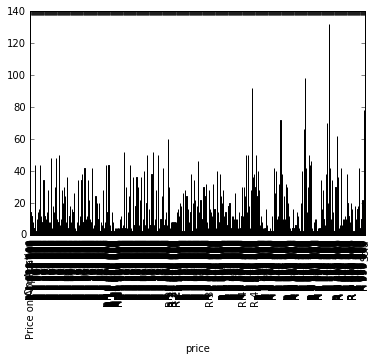

In [98]:
listings.groupby('price').agg('count')['bedrooms'].plot(kind = 'bar')

#### transforming a value using a helper function

In [60]:
listings['price'] = listings['price'].apply(lambda x: clean_price(x))

In [65]:
def clean_price(x):
    try:
        return float(x[1:].replace(' ',''))
    except ValueError:
        return 0